In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torch.nn as nn

In [6]:
# Load the dataset
df= pd.read_csv("netflix.csv")
closed_prices = df["Close"]

In [7]:
seq_len = 15

In [8]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [9]:
X=[]
Y=[]

In [10]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [11]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [12]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [13]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [14]:
model = Model(1,64)

In [15]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
loss_fn = nn.MSELoss()

In [17]:
num_epochs=100

In [18]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())


10 epoch loss 0.0058853747
20 epoch loss 0.0047834227
30 epoch loss 0.004628013
40 epoch loss 0.0040912433
50 epoch loss 0.00351331
60 epoch loss 0.0026417272
70 epoch loss 0.00089845824
80 epoch loss 0.00042463024
90 epoch loss 0.0001677484


In [19]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [20]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

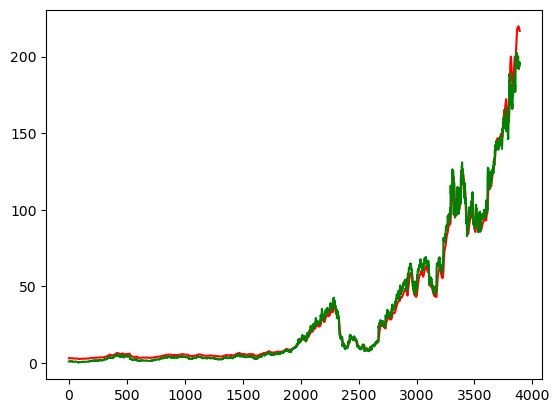

In [23]:
# Plotting
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()

In [ ]:
# so above is the stock price prediction done using LSTM in jupyter notebook